In [338]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from color_util import *
from color_cluster import* 
from color_pop_util import *
from colour import hsl2rgb
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, deltaE_cie76,lab2rgb

dat=pd.read_csv("project_pop_color_hsl_200.csv")
#dat=pd.read_csv("project_pop_color_hsl_only_max_200.csv")
dat.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
dat.fillna(value=0,inplace=True)
#dat

In [339]:
#for i in range(dat.shape[0]):
dat_rowmax=dat.copy()
rowmax=dat.drop(columns=['time','project_id']).idxmax(axis=1) 
#for i in range(dat.shape[0]):
#    for j in range(150):
#        if j!=rowmax[i]:
#            dat_rowmax.iloc[i][str(j)]=0

In [340]:
dat.head()

,project_id,time,0,1,2,3,4,5,6,7,...,140,141,142,143,144,145,146,147,148,149
0,21352836,2018/03/12,466.0,2237.0,659.0,118.0,9.0,12.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3990231,2010/05/12,0.0,39.0,2599.0,3614.0,0.0,55.0,114.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8802471,2012/08/22,0.0,73.0,247.0,28.0,0.0,17.0,1513.0,7261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21395700,2018/03/19,277.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4293173,2010/07/25,0.0,4.0,54.0,20.0,1.0,0.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [341]:
#dat
hsl_cat=np.zeros((6,5,5))
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100]]

hue_value=[0,60,120,180,240,300]
satuation_value=[10,30,50,70,90]
lightness_value=[10,30,50,70,90]

In [342]:
start=pd.to_datetime('2010/12')
end=pd.to_datetime('2020/05')
x=dat[pd.to_datetime(dat['time'])>start].copy()
x=x[pd.to_datetime(x['time'])<end]

In [343]:
x=x.sort_values('time')
x_day=x.groupby('time').sum()
x_day.drop(columns=["project_id"],inplace=True)
x_day.reset_index(inplace=True)
#x=x.fillna(value=0)

In [344]:
x_week=x_day.copy()
x_week['time']=pd.to_datetime(x_week['time']) - pd.to_timedelta(7, unit='d')
x_week = x_week.groupby(pd.Grouper(key='time', freq='W-MON')).sum().reset_index().sort_values('time')
x_week.head()

,time,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,2010-11-29,421.0,23178.0,22028.0,3285.0,411.0,2249.0,26326.0,25425.0,10718.0,...,70.0,24.0,0.0,0.0,9.0,2.0,0.0,0.0,0.0,9.0
1,2010-12-06,1868.0,26461.0,30893.0,10594.0,722.0,3971.0,19305.0,6200.0,5165.0,...,674.0,275.0,0.0,0.0,5.0,806.0,8.0,0.0,0.0,2.0
2,2010-12-13,1022.0,19874.0,21383.0,17578.0,10612.0,1483.0,9806.0,22330.0,7153.0,...,25.0,10.0,0.0,632.0,492.0,1.0,1.0,0.0,58.0,164.0
3,2010-12-20,2388.0,32992.0,30457.0,18812.0,2646.0,9164.0,33422.0,23370.0,20981.0,...,48.0,245.0,128.0,200.0,64.0,1.0,2.0,2.0,50.0,131.0
4,2010-12-27,3611.0,50706.0,66879.0,14934.0,1487.0,6425.0,62710.0,47141.0,26668.0,...,652.0,5206.0,5770.0,2098.0,220.0,292.0,5781.0,6994.0,1933.0,471.0


In [345]:
x_week['tot']=x_week.iloc[:, 1:].sum(axis=1)


In [383]:
color_sort=(x_week.sum(axis=0).sort_values()[::-1])[1:]
#color_sort

In [347]:
def hsl_category_to_rgb():
    color_rgb=[]
    for i in range(150):
        i1,i2,i3=oneD_to_3D_index(i)
        color_hsl=np.asarray([hue_value[i1]/360.,satuation_value[i2]/100.,lightness_value[i3]/100.])
        color_rgb_i=np.asarray(hsl2rgb(color_hsl))
        color_rgb.append(color_rgb_i)
        
    return color_rgb
color_rgb=hsl_category_to_rgb()

In [348]:
#fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()

#ax.plot(pd.to_datetime(x_week['time']),x_week['0'].rolling(4).sum()/x_week['tot'].rolling(4).sum(),color=color_rgb[0])#c=colorcode['hexcode'][c])
#for c in range(1,150):
#    ax.plot(pd.to_datetime(x_week['time']),x_week[str(c)].rolling(4).sum()/x_week['tot'].rolling(4).sum(),color=color_rgb[c])

In [349]:
# monthly

x_month=x_week.copy()
x_month=x_month.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')



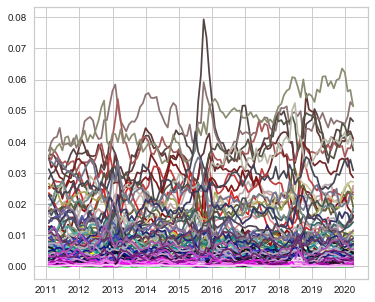

In [350]:
fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()

ax.plot(pd.to_datetime(x_month['time']),x_month['0'].rolling(4,center=True).mean()/x_month['tot'].rolling(4,center=True).mean(),color=color_rgb[0])#c=colorcode['hexcode'][c])
for c in range(1,150):
    ax.plot(pd.to_datetime(x_month['time']),x_month[str(c)].rolling(4,center=True).mean()/x_month['tot'].rolling(4,center=True).mean(),color=color_rgb[c])

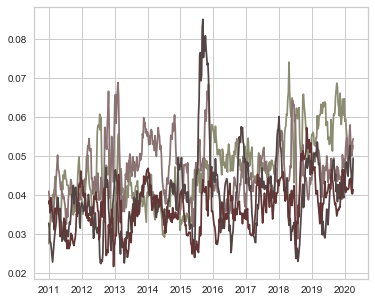

In [351]:
fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()
x_plot=x_week.copy()
ax.plot(pd.to_datetime(x_plot['time']),x_plot[color_sort.keys()[0]].rolling(8,center=True).mean()/x_plot['tot'].rolling(8,center=True).mean(),color=color_rgb[int(color_sort.keys()[0])])#c=colorcode['hexcode'][c])
for i in range(1,4):
    ax.plot(pd.to_datetime(x_plot['time']),x_plot[color_sort.keys()[i]].rolling(8,center=True).mean()/x_plot['tot'].rolling(8,center=True).mean(),color=color_rgb[int(color_sort.keys()[i])])

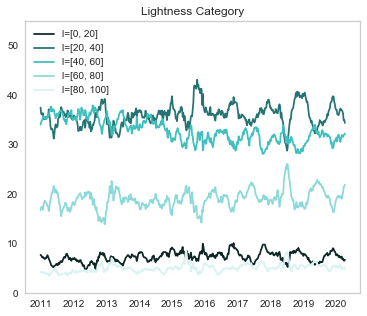

In [433]:
fig, ax = plt.subplots(figsize=(6,5))
for i in range(5):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=2,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([0.5,0.5,lightness_value[i]/100.]),
           label='l='+str(lightness[i]))
ax.legend(loc='upper left')
ax.set_ylim([0,55])
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.set_title("Lightness Category")
ax.grid(False)

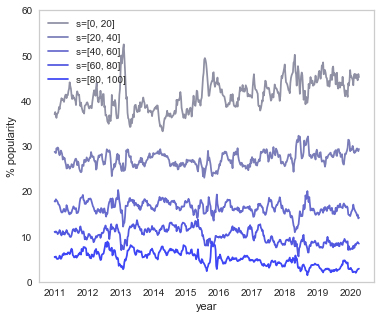

In [436]:
fig, ax = plt.subplots(figsize=(6,5))
for i in range(5):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=1,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([0.66,lightness_value[i]/100.,0.6]),
            label='s='+str(satuation[i]))
ax.legend()
ax.set_ylim([0,60])
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.set_label('% popularity')
ax.grid(False)

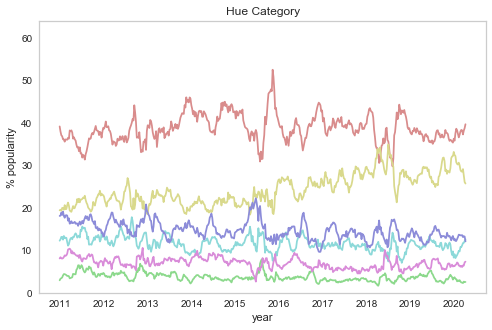

In [437]:
fig, ax = plt.subplots(figsize=(8,5))
for i in range(6):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=0,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([hue_value[i]/360.,0.5,0.7]))
ax.set_ylim([0,64])
ax.set_title("Hue Category")
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.grid(False)

In [355]:
#x_day
## project to 3 axis:

def marginal_index(axis=0,cat=0):
    hsl_cat=np.arange(150).reshape((6,5,5))
    if axis==0:
        index=hsl_cat[cat,:,:]
    if axis==1:
        index=hsl_cat[:,cat,:]
    if axis==2:
        index=hsl_cat[:,:,cat]
    return index.flatten()
marginal_i=marginal_index(axis=1,cat=2)
marginal_i


def marginal_cat(df,axis=0,cat=0):
    marginal_i=marginal_index(axis=axis,cat=cat)
    i_str=[str(i) for i in marginal_i]
    
    return df[i_str].sum(axis=1)

test=marginal_cat(x_month,axis=0,cat=0)
#teste

In [356]:
#color_count=dat[dat['project_id']==4612394].iloc[0][2:]
#color_order=np.argsort(color_count)[::-1]

#for i in range(12):
#    plt.bar([i+1],[color_count[color_order[i]]],color=color_rgb[color_order[i]])
#plt.xlabel("popularity ranking",fontsize=15)
#plt.ylabel("number of pixels",fontsize=15)
#plt.grid("false")


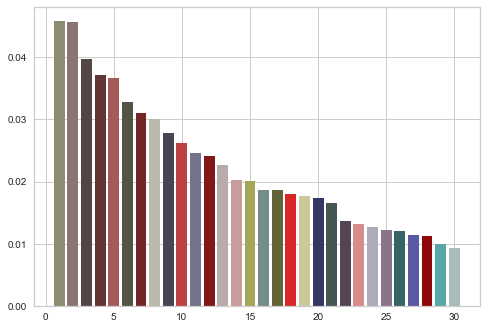

In [360]:
for i in range(30):
    plt.bar([i+1],[color_sort[i]/color_sort.sum()],color=color_rgb[int(color_sort.keys()[i])])
#color_sort.keys()

In [394]:
#oneD_to_3D_index(8)
#x_week

In [392]:
columns=['time']
columns.extend(['h'+str(i) for i in range(6)])
columns.extend(['s'+str(i) for i in range(5)])
columns.extend(['l'+str(i) for i in range(5)])
columns.append('tot')
dat_marginal=pd.DataFrame(columns=columns)
dat_marginal['time']=x_week['time']
dat_marginal['tot']=x_week['tot']
#for idex,row in x_week.iterrows():
#    element={}
#    element['time']=row['time']
    
for i in range(5):
    dat_marginal['h'+str(i)]=marginal_cat(x_week,axis=0,cat=i)
    dat_marginal['s'+str(i)]=marginal_cat(x_week,axis=1,cat=i)
    dat_marginal['l'+str(i)]=marginal_cat(x_week,axis=1,cat=i)
dat_marginal['h5']=marginal_cat(x_week,axis=0,cat=5)
    
   

In [395]:
dat_marginal.head()

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
0,2010-11-29,274261.0,82465.0,11318.0,81405.0,108208.0,19591.0,182657.0,152394.0,112856.0,83424.0,45917.0,182657.0,152394.0,112856.0,83424.0,45917.0,577248.0
1,2010-12-06,184853.0,124371.0,10910.0,51634.0,114893.0,44134.0,263506.0,127577.0,59196.0,59014.0,21502.0,263506.0,127577.0,59196.0,59014.0,21502.0,530795.0
2,2010-12-13,280199.0,105914.0,28284.0,61996.0,163824.0,61790.0,285750.0,151322.0,119489.0,87047.0,58399.0,285750.0,151322.0,119489.0,87047.0,58399.0,702007.0
3,2010-12-20,350546.0,227911.0,17213.0,146759.0,186255.0,71605.0,364255.0,308272.0,166196.0,99211.0,62355.0,364255.0,308272.0,166196.0,99211.0,62355.0,1000289.0
4,2010-12-27,505244.0,253558.0,25010.0,98515.0,243449.0,97694.0,441260.0,332584.0,243402.0,146326.0,59898.0,441260.0,332584.0,243402.0,146326.0,59898.0,1223470.0


In [396]:
dat_marginal_month=dat_marginal.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')
dat_marginal_month.head()

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
0,2010-11-30,274261.0,82465.0,11318.0,81405.0,108208.0,19591.0,182657.0,152394.0,112856.0,83424.0,45917.0,182657.0,152394.0,112856.0,83424.0,45917.0,577248.0
1,2010-12-31,1320842.0,711754.0,81417.0,358904.0,708421.0,275223.0,1354771.0,919755.0,588283.0,391598.0,202154.0,1354771.0,919755.0,588283.0,391598.0,202154.0,3456561.0
2,2011-01-31,1775625.0,926829.0,199559.0,726455.0,890052.0,406352.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,4924872.0
3,2011-02-28,1436516.0,877117.0,185389.0,456796.0,691503.0,404594.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,4051915.0
4,2011-03-31,1244214.0,682934.0,107682.0,358595.0,555070.0,344487.0,1327320.0,922257.0,525290.0,350230.0,167885.0,1327320.0,922257.0,525290.0,350230.0,167885.0,3292982.0


In [418]:
dat_rf=pd.read_csv("color_feature_hsl/color_weekly_feature_to_month_h0.csv")
time=dat_rf['month']

'2012-03-31'

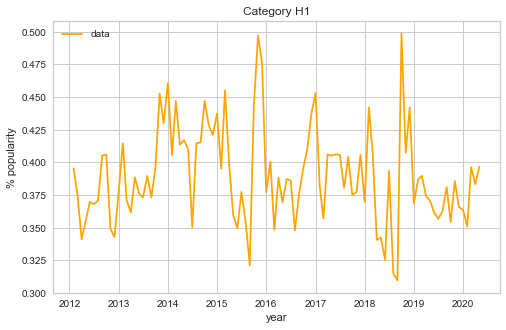

In [422]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pd.to_datetime(time),dat_rf['y'],color='orange',label='data')
ax.set_title("Category "+'h1'.upper())
ax.set_xlabel('year')
ax.set_ylabel('% popularity')
ax.legend(loc="upper left")
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)

#datemin = np.datetime64(time.iloc[0], 'Y')
#datemax = np.datetime64(time.iloc[-1], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)

In [402]:
from color_weekly_make_feature_hsl import *

#dat_h0=get_dataframe_for_model(dat_marginal,dat_marginal_month,column='h0')
dat_marginal.to_csv("pop_color_hsl_marginal_weekly.csv")
dat_marginal_month.to_csv("pop_color_hsl_marginal_monthly.csv")

In [26]:
x_day.index=pd.to_datetime(x_day.index)

In [206]:
color_time_136['tot']=color_time_136.iloc[:, 1:].sum(axis=1)

In [273]:
y=x_week[41]/x_week['tot']

In [409]:
#y.rolling(4).mean()
#y

In [437]:
#fig, ax = plt.subplots(figsize=(12,6))
#ax.plot(x_week['time'],y.rolling(4).mean())#.sum())
#plt.xlim([2015,2021])

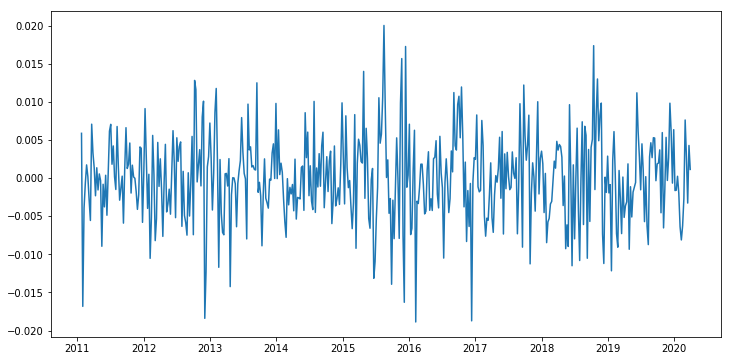

In [240]:
%matplotlib inline
yy=y.rolling(8).mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_week['time'][2:],yy.diff()[2:])


In [249]:
result = adfuller(yy.diff()[8:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.350812
p-value: 0.000000


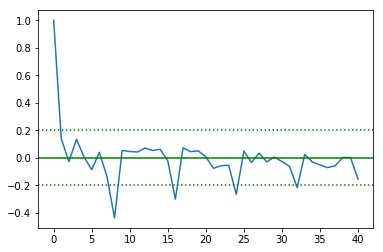

In [252]:
yd=yy.diff()[8:]
plt.plot(pacf(yd))
plt.axhline(y=0.2,color='green',ls=":")
plt.axhline(y=-0.2,color='green',ls=":")
plt.axhline(y=0,color='green')

In [363]:
#stat=x_week[i:i+num_roll][41].describe()
#x_week[41]/x_week['tot'].rolling(2).mean()

In [365]:
feature=pd.read_csv("color_pop_weekly_features_41.csv")[:-4]

In [372]:
y=(x_week[41]/x_week['tot']).rolling(num_roll).mean()[num_roll-1+num_pre:][4:]
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [411]:
result = adfuller(y[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.389225
p-value: 0.144801


In [428]:
model_fit.plot_predict?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


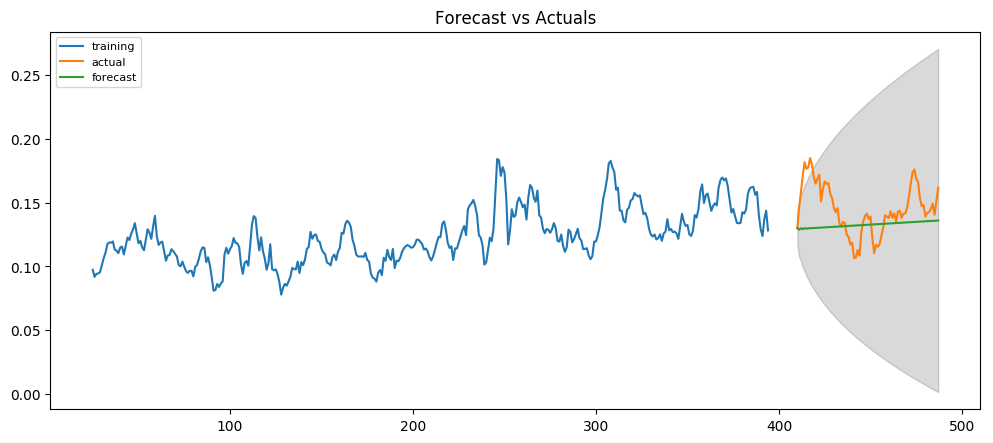

In [426]:
train=y[:370]
test=y[385:]
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(78, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [457]:
y=pd.read_csv("pro_color_time_for_ts.csv")
#feature
feature=x_week.copy()#[41]/x_week['tot']
#fig, ax = plt.subplots(figsize=(12,6))
#ax.plot(feature.rolling(4).mean())
feature=feature[['time',41]]#.head()
feature[41]=x_week[41]/x_week['tot']

In [494]:
colname=['month']
colname.extend([str(i) for i in range(8)])
data=pd.DataFrame(columns=colname)
data['month']=y.time[60:]
data.reset_index(inplace=True)

In [508]:
#y.time[34]
#data['month']


In [509]:
for i in range(data.shape[0]):#[:5]:
    month=pd.to_datetime(data['month'].iloc[i])
    start=month - pd.DateOffset(months=2)
    end=month
    print(start,end)
    xs=feature[pd.to_datetime(feature['time'])>=start]
    xs=xs[pd.to_datetime(xs['time'])<end].iloc[-8:]
    xs.reset_index(inplace=True)
    print(xs)
    print('')
    for j in range(8):
        data[str(j)].iloc[i]=xs.iloc[j][41]

2012-01-01 00:00:00 2012-03-01 00:00:00
   index       time        41
0     58 2012-01-09  0.126941
1     59 2012-01-16  0.127774
2     60 2012-01-23  0.127765
3     61 2012-01-30  0.128709
4     62 2012-02-06  0.108976
5     63 2012-02-13  0.097896
6     64 2012-02-20  0.109212
7     65 2012-02-27  0.109290

2012-02-01 00:00:00 2012-04-01 00:00:00
   index       time        41
0     62 2012-02-06  0.108976
1     63 2012-02-13  0.097896
2     64 2012-02-20  0.109212
3     65 2012-02-27  0.109290
4     66 2012-03-05  0.112666
5     67 2012-03-12  0.113202
6     68 2012-03-19  0.111353
7     69 2012-03-26  0.109177

2012-03-01 00:00:00 2012-05-01 00:00:00
   index       time        41
0     67 2012-03-12  0.113202
1     68 2012-03-19  0.111353
2     69 2012-03-26  0.109177
3     70 2012-04-02  0.110951
4     71 2012-04-09  0.107447
5     72 2012-04-16  0.094050
6     73 2012-04-23  0.095211
7     74 2012-04-30  0.102398

2012-04-01 00:00:00 2012-06-01 00:00:00
   index       time        

2014-04-01 00:00:00 2014-06-01 00:00:00
   index       time        41
0    175 2014-04-07  0.099068
1    176 2014-04-14  0.097396
2    177 2014-04-21  0.087326
3    178 2014-04-28  0.084482
4    179 2014-05-05  0.091040
5    180 2014-05-12  0.087314
6    181 2014-05-19  0.100253
7    182 2014-05-26  0.106353

2014-05-01 00:00:00 2014-07-01 00:00:00
   index       time        41
0    180 2014-05-12  0.087314
1    181 2014-05-19  0.100253
2    182 2014-05-26  0.106353
3    183 2014-06-02  0.091390
4    184 2014-06-09  0.112398
5    185 2014-06-16  0.104924
6    186 2014-06-23  0.110999
7    187 2014-06-30  0.121418

2014-06-01 00:00:00 2014-08-01 00:00:00
   index       time        41
0    184 2014-06-09  0.112398
1    185 2014-06-16  0.104924
2    186 2014-06-23  0.110999
3    187 2014-06-30  0.121418
4    188 2014-07-07  0.103731
5    189 2014-07-14  0.105240
6    190 2014-07-21  0.090959
7    191 2014-07-28  0.100795

2014-07-01 00:00:00 2014-09-01 00:00:00
   index       time        

KeyboardInterrupt: 

In [498]:
xs=feature[pd.to_datetime(feature['time'])>=start]
xs=xs[pd.to_datetime(xs['time']).all()<end]

TypeError: invalid_op() got an unexpected keyword argument 'skipna'

In [459]:
feature[41]=feature[41].rolling(4).mean()

In [488]:
#pd.to_datetime(data['month']) - pd.DateOffset(months=1)
np.sum(feature['time'].isna())

0

In [512]:
#feature

In [436]:
#X_train, X_valid, y_train, y_valid = train_test_split(feature, y, 
#                                                                train_size=0.8, test_size=0.2,
#                                                                random_state=1)

X_train=feature[1:370]
y_train=y.diff()[1:370]
X_valid=feature[370:]
y_valid=y.diff()[370:]
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=2, random_state=1)
model.fit(X_train, y_train)
    
preds = model.predict(X_valid)
r2 = r2_score(y_valid, preds)

#get_importance(feature,y)

In [416]:
#plt.plot(range(93),y_valid)
#plt.plot(range(93),preds)

#X_valid
#y_valid.shape
#y.shape
r2

0.06288328631420903

In [374]:
def get_importance(x,y,year=2014,random_state=0,n_estimators=100):   
    
    
    X_train, X_valid, y_train, y_valid = train_test_split(x, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=random_state)

    model = RandomForestRegressor(n_estimators=n_estimators,min_samples_leaf=2, random_state=random_state)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_valid)
    r2 = r2_score(y_valid, preds)
    
    print('R2 score:', r2)

    
    #importance=pd.DataFrame(data= {'importance':model.feature_importances_}, index=col_x)
    return r2#importance,r2


In [514]:
x_week.to_csv("project_color_pop_weekly.csv")

In [517]:
x_week.tail()

,time,0,1,2,3,4,5,6,7,8,...,127,128,129,130,131,132,133,134,135,tot
483,2020-03-02,1822.0,0.0,0.0,0.0,0.0,0.0,293.0,19839.0,0,...,5163.0,1216.0,999.0,805.0,81.0,1.0,350.0,0,0.0,841438.0
484,2020-03-09,1456.0,0.0,0.0,7.0,1.0,124.0,394.0,38189.0,0,...,9911.0,3650.0,132.0,0.0,56.0,0.0,368.0,0,74.0,825012.0
485,2020-03-16,703.0,0.0,0.0,0.0,0.0,17.0,1091.0,43715.0,0,...,8502.0,5943.0,646.0,0.0,1.0,0.0,290.0,0,1.0,972149.0
486,2020-03-23,1219.0,0.0,35.0,1.0,0.0,0.0,3535.0,35470.0,0,...,4078.0,2784.0,472.0,0.0,19.0,10.0,396.0,0,5.0,809561.0
487,2020-03-30,44.0,0.0,0.0,0.0,0.0,0.0,1.0,14264.0,0,...,549.0,294.0,344.0,0.0,0.0,0.0,48.0,0,0.0,142200.0


In [256]:
model = ARIMA(yd, order=(8,1,8))
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [55]:
keep=['time']
keep.extend([str(i) for i in range(949)])
x_month=x[keep].copy()
#for i in range(len(dat['time'])):
#    x_month['time'][i]=dat['time'][i][:-3]

In [62]:
#x_month=x_month.reset_index()
#x_month['time']=x_month['time'][:-3]#.groupby('time').sum()

In [181]:
tot=x_week.sum(axis=0)
color_count=tot
color_count=color_count/color_count['tot']
rank=color_count.sort_values(ascending=False)[1:]
#rank


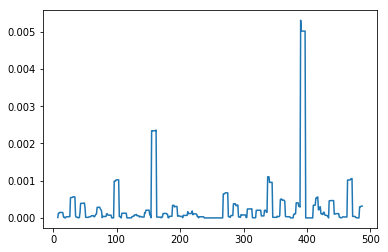

In [634]:
plt.plot((x_week[(color_rank_index[80])]/x_week['tot']).rolling(8).mean())

In [663]:
#dat_rf=pd.read_csv("color_weekly_feature_to_month_41.csv")

random_state=1
n_estimators=11
#X_train, X_valid, y_train, y_valid = train_test_split(x.drop(columns='month'), y, 
#                                                            train_size=0.8, test_size=0.2,
#                                                            random_state=random_state)


xx=x.drop(columns='month')
xx[xx.columns[:8]]=np.log(xx[xx.columns[:8]])+20
X_train=xx.iloc[:77]
y_train=np.log(y.iloc[:77])+20
X_valid=xx.iloc[80:]
y_valid=np.log(y.iloc[80:])+20

model = RandomForestRegressor(n_estimators=n_estimators,min_samples_leaf=2, random_state=random_state)
model.fit(X_train, y_train)

preds = model.predict(X_valid)
r2 = r2_score(y_valid, preds)

print('R2 score:', r2)
#preds = model.predict(X_train)
#r2 = r2_score(y_train, preds)
r2

R2 score: 0.22068645482599825


0.22068645482599825

In [667]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})
forecast_accuracy(preds,y_valid)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.005890881440328979,
 'me': -0.008691666422853258,
 'mae': 0.10638637868474507,
 'mpe': -0.00042584127419437575,
 'rmse': 0.13082967567681725,
 'acf1': 0.9213111426100234,
 'corr': 0.49489983307691493,
 'minmax': 0.005867825337960375}

(17,)


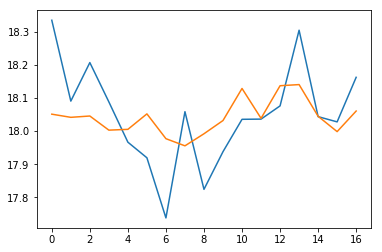

In [665]:
print(preds.shape)
plt.plot(range(17),y_valid)
plt.plot(range(17),preds)
#plt.ylim([0.08,0.20])

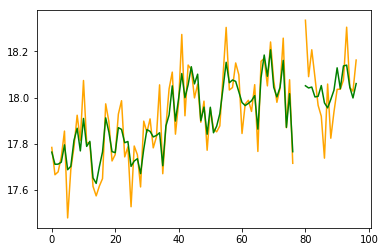

In [666]:
preds_train = model.predict(X_train)
#r2 = r2_score(y_train, preds)

plt.plot(range(77),y_train,color='orange')
plt.plot(range(77),preds_train,color='g')
plt.plot(range(80,97),y_valid,color='orange')
plt.plot(range(80,97),preds,color='g')

In [670]:
rank.to_csv('color_rank_136.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [555]:
dat_rf=pd.read_csv("color_weekly_feature_to_month_41.csv")

In [557]:
#dat_rf
#yy=pd.read_csv("pro_color_time_for_ts.csv")#dat_rf['y']

In [567]:
x=dat_rf.drop(columns=['Unnamed: 0','index','y']).copy()
y=dat_rf['y'].copy()

In [574]:
x['year']=x['month'].apply(lambda x: int(x[:4])

In [578]:
x['m']=x['month'].apply(lambda x: int(x[-2:]))

In [16]:
hsl_cat=np.arange(150).reshape((6,5,5))
hsl_cat[1]

array([[25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [22]:
a=np.asarray([[1, 3], [2, 4]])

In [23]:
a.flatten()

array([1, 3, 2, 4])

In [114]:
import operator
max(stats.items(), key=operator.itemgetter(1))[0]

'b'

In [116]:
z=np.array([1, 3, 2, 4])
np.argmax(z)

3